# Titanic challenge

This problem is proposed by kaggle competition the main objectif is to predict which passengers survived the Titanic shipwreck.

The dataset used in this notebook are proposed by kaggle : https://www.kaggle.com/c/titanic

Steps
Acquiring the data
Analysing the data
Visualizing the data
Completing the data
Correcting the data
Classifying using a model


In [938]:
#importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Acquire the data

In [939]:
#importing the dataset
trainning_dataset = pd.read_csv('train.csv')
testing_dataset   = pd.read_csv('test.csv')
dataset           = trainning_dataset.append(testing_dataset)

In [940]:
#dataset shapes
print(" training dataset shape", trainning_dataset.shape)
print(" testing dataset shape", trainning_dataset.shape)
print(" all dataset shape", dataset.shape)

 training dataset shape (891, 12)
 testing dataset shape (891, 12)
 all dataset shape (1309, 12)


# Analysing the data

In [941]:
#let's take sight to our dataset
trainning_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [942]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [943]:
print(dataset.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [944]:
# which features are numerical and categorical
categorical_values = list()
numerical_values   = list()
for elm in dataset:
    if dataset[elm].dtype == 'object':
        categorical_values.append(elm)
    else:
        numerical_values.append(elm)
        pass
    pass
pass

In [945]:
print("categorical values", categorical_values)
print("numerical values", numerical_values)

categorical values ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical values ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [946]:
for elm in dataset:
    if dataset[elm].dtype == 'object':
        print("the element",elm," contiens", len(dataset[elm].unique()), "category")
        pass
    pass
pass

the element Name  contiens 1307 category
the element Sex  contiens 2 category
the element Ticket  contiens 929 category
the element Cabin  contiens 187 category
the element Embarked  contiens 4 category


let's take a look at Ticket and Cabin because they contient lot of categories 

In [947]:
dataset['Ticket'][:40].values

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651'], dtype=object)

it's a mixed data type (numerical + categorical)

In [948]:
print(dataset['Survived'][dataset['Survived'] == 0].count(), "Deaths")
print(dataset['Survived'][dataset['Survived'] == 1].count(), "Alives")

549 Deaths
342 Alives


In [949]:
dataset[["Parch", "PassengerId"]].groupby(['Parch']).count()

,PassengerId
Parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


In [950]:
dataset[["SibSp", "PassengerId"]].groupby(['SibSp']).count()

,PassengerId
SibSp,
0,891
1,319
2,42
3,20
4,22
5,6
8,9


Using groupby on Sibsb & Parch we can know the nombre of passengers with their parents & siblings

In [951]:
# which features contiens null values
for elm in dataset:
    print(elm," : ",float((dataset[elm].isnull().sum()/1309)),"%")
    pass
pass

PassengerId  :  0.0 %
Survived  :  0.31932773109243695 %
Pclass  :  0.0 %
Name  :  0.0 %
Sex  :  0.0 %
Age  :  0.20091673032849502 %
SibSp  :  0.0 %
Parch  :  0.0 %
Ticket  :  0.0 %
Fare  :  0.0007639419404125286 %
Cabin  :  0.774637127578304 %
Embarked  :  0.0015278838808250573 %


Survived, Age, Fare, Cabin, Embarked need correction and we could drop the column Cabin because it contiens lot of null values, 
to avoid the over fitting of the most appeared element it's much better to drop it all

In [952]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Visualization of our data 

Text(0.5, 1.0, 'Sublim/spouses vs Survived')

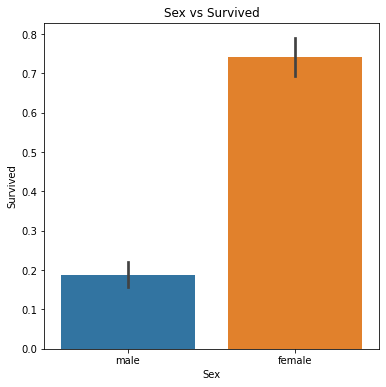

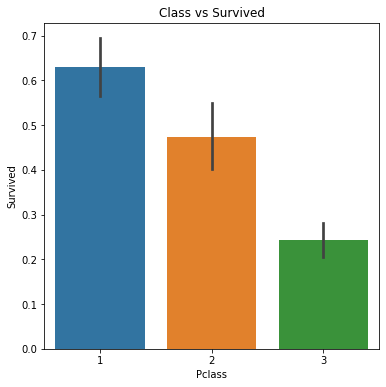

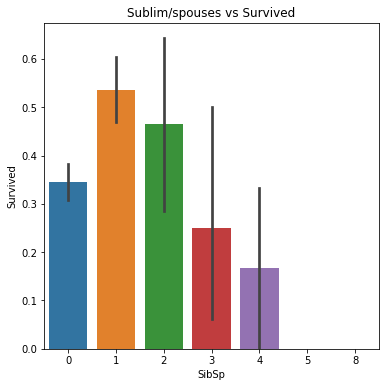

In [953]:
#let take a look to our data using matplotlib and seaborn
plt.figure(figsize=(6,6))
sns.barplot(x = dataset['Sex'], y = dataset['Survived'])
plt.title('Sex vs Survived')

plt.figure(figsize=(6,6))
sns.barplot(x = dataset['Pclass'], y = dataset['Survived'])
plt.title('Class vs Survived')

plt.figure(figsize=(6,6))
sns.barplot(x = dataset['SibSp'], y = dataset['Survived'])
plt.title('Sublim/spouses vs Survived')

Text(0.5, 1.0, 'Sex vs Survived')

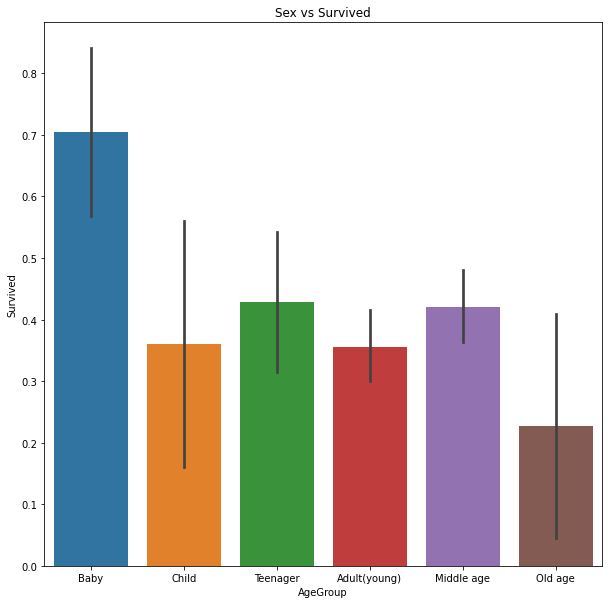

In [954]:
bins=[0,5,12,18,30,60,np.inf]
labels=['Baby','Child','Teenager','Adult(young)','Middle age','Old age']
dataset['AgeGroup'] = pd.cut(dataset["Age"], bins, labels = labels)

plt.figure(figsize=(10,10))
sns.barplot(x = dataset['AgeGroup'] , y = dataset['Survived'])
plt.title('Sex vs Survived')

# Correlation between the columns

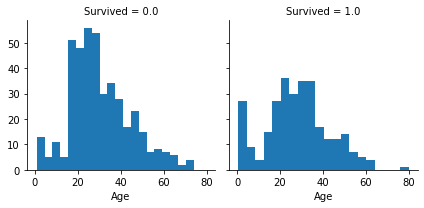

In [955]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

we can understand that lot of people in the middle age (between 20 and 50) they pass away

C:\Users\Supernova\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


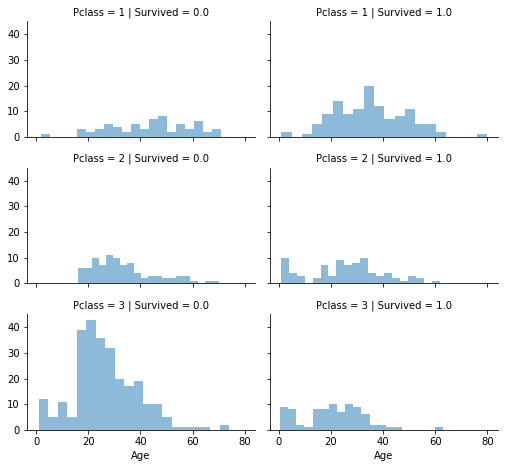

In [956]:
grid = sns.FacetGrid(dataset, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

lot of people in class == 3 between the age 20 and 50 are deaths

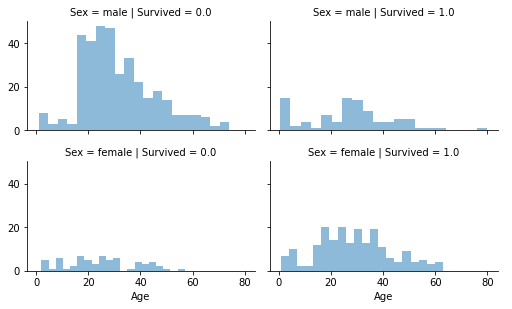

In [957]:
grid = sns.FacetGrid(dataset, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

most of people are men

C:\Users\Supernova\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Supernova\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


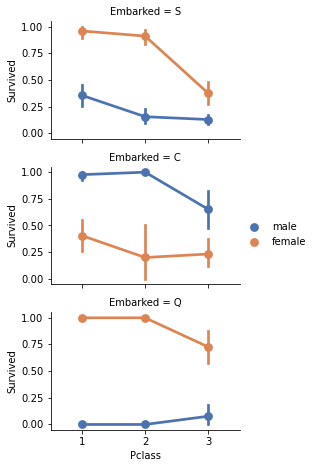

In [958]:
grid = sns.FacetGrid(dataset, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Groupby method will allows us to know the percent of people stay alive per Pclass, Sex, Parch and sib sp

In [959]:
dataset.groupby(['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0.0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1.0,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [960]:
dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [961]:
dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [962]:
dataset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


In [963]:
dataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Correction of the data

In [964]:
#to correct our data we should drop Cabin because it contiens lot of null values also ticket because it contiens lot of duplication
trainning_dataset = trainning_dataset.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)
testing_dataset   = testing_dataset.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)

In [965]:
for dataset in [trainning_dataset, testing_dataset]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    pass
pass

In [966]:
pd.crosstab(trainning_dataset['Title'], trainning_dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [967]:
pd.crosstab(testing_dataset['Title'], testing_dataset['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [968]:
for dataset in [trainning_dataset, testing_dataset]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    pass
pass

In [969]:
trainning_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [970]:
to_numerical = LabelEncoder()
trainning_dataset["Title code"] = to_numerical.fit_transform(trainning_dataset["Title"])

In [971]:
to_numerical = LabelEncoder()
testing_dataset["Title code"] = to_numerical.fit_transform(testing_dataset["Title"])

In [972]:
trainning_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2


In [973]:
to_numerical = LabelEncoder()
testing_dataset["Sex"] = to_numerical.fit_transform(testing_dataset["Sex"])
trainning_dataset["Sex"] = to_numerical.fit_transform(trainning_dataset["Sex"])

In [974]:
to_numerical = LabelEncoder()
testing_dataset["Embarked"] = to_numerical.fit_transform(testing_dataset["Embarked"])

In [975]:
to_numerical = LabelEncoder()
trainning_dataset['Embarked'] = trainning_dataset['Embarked'].replace(np.nan, 'S')
trainning_dataset['Embarked'] = to_numerical.fit_transform(trainning_dataset["Embarked"])

In [976]:
trainning_dataset = trainning_dataset.drop(['Title', 'Name'], axis = 1)
testing_dataset   = testing_dataset.drop(['Title', 'Name'], axis = 1)

In [977]:
trainning_dataset['Age'].isnull().sum()

177

In [978]:
testing_dataset['Age'].isnull().sum()

86

In [979]:
trainning_dataset['Age'] = trainning_dataset['Age'].fillna(trainning_dataset['Age'].median())
testing_dataset['Age']   = testing_dataset['Age'].fillna(testing_dataset['Age'].median())

In [980]:
trainning_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title code
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


In [981]:
#let's check of all the values are complet
trainning_dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title code    0
dtype: int64

# model selection & prediction

In [982]:
from sklearn.model_selection import train_test_split
X = trainning_dataset.drop(trainning_dataset.Survived)
y = trainning_dataset.Survived
x_train, x_test, y_train, y_test = train_test_split(X,y[2:], test_size = 0.3)

In [983]:
MAE = list()
MSE = list()
RMSE = list()
Var = list()

## Logstic regression

In [984]:
from sklearn.linear_model import LogisticRegression

In [985]:
logstic_regression = LogisticRegression()
logstic_regression.fit(x_train,y_train)
y_pred = logstic_regression.predict(x_test)

C:\Users\Supernova\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [986]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
VarScore: 1.0


In [987]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# K neighbors classifier

In [988]:
from sklearn.neighbors import KNeighborsClassifier

In [989]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [990]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.2247191011235955
MSE: 0.2247191011235955
RMSE: 0.4740454631399772
VarScore: 0.10040532715691974


In [991]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# Neural netowrk 

In [992]:
def build_model(dense_dimension = 200):
    model = Sequential()
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error')
    return model

In [993]:
model = build_model(200)
model.fit(x = x_train, y = y_train,
          batch_size=200,epochs=500)
y_pred = model.predict(x_test)

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4/4 [==============================] - 0s 2ms/step - loss: 7.9282
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 5.4206
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 1.2283
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.9640
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5689
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6581
Epoch 7/500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 96/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 97/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 98/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 99/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 100/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 101/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 102/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 103/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 104/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 107/500
4/4 [==============================] - 0s 2m

4/4 [==============================] - 0s 3ms/step - loss: 0.1067
Epoch 197/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0842
Epoch 198/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0688
Epoch 199/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 200/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 201/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 202/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 203/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 204/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 205/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 206/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 208/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 298/500
4/4 [==============================] - 0s 3ms/step - loss: 6.0258e-04
Epoch 299/500
4/4 [==============================] - 0s 3ms/step - loss: 5.9028e-04
Epoch 300/500
4/4 [==============================] - 0s 3ms/step - loss: 4.6786e-04
Epoch 301/500
4/4 [==============================] - 0s 3ms/step - loss: 4.3308e-04
Epoch 302/500
4/4 [==============================] - 0s 2ms/step - loss: 8.9541e-04
Epoch 303/500
4/4 [==============================] - 0s 2ms/step - loss: 7.7708e-04
Epoch 304/500
4/4 [==============================] - 0s 3ms/step - loss: 8.1932e-04
Epoch 305/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 306/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 307/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 308/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 309/500
4/4 [=======

4/4 [==============================] - 0s 2ms/step - loss: 1.7410e-04
Epoch 398/500
4/4 [==============================] - 0s 3ms/step - loss: 2.2063e-04
Epoch 399/500
4/4 [==============================] - 0s 3ms/step - loss: 2.6875e-04
Epoch 400/500
4/4 [==============================] - 0s 3ms/step - loss: 2.5012e-04
Epoch 401/500
4/4 [==============================] - 0s 3ms/step - loss: 6.7749e-04
Epoch 402/500
4/4 [==============================] - 0s 2ms/step - loss: 9.6817e-04
Epoch 403/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 404/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 405/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 406/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 407/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 408/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 409/500
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 498/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 499/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 500/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0015


In [994]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.02433335939108321
MSE: 0.0013911271976834512
RMSE: 0.037297817599471574
VarScore: 0.9952924426500486


In [995]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# Support vector Machine 

In [996]:
from sklearn import svm

In [997]:
linear_svc = svm.LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)

C:\Users\Supernova\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [998]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
VarScore: 1.0


In [999]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

In [1001]:
Dict = {'models' : ["Logstic Regression", "K neighbor classifier ","Neural Network","Support Vector Machine"],
       "MAE" : MAE,
       "MSE": MSE,
       "RMSE": RMSE,
       "VarScore":Var}
data = pd.DataFrame(Dict)

In [1002]:
data

,models,MAE,MSE,RMSE,VarScore
0,Logstic Regression,0.000000,0.000000,0.000000,1.000000
1,K neighbor classifier,0.224719,0.224719,0.474045,0.100405
2,Neural Network,0.024333,0.001391,0.037298,0.995292
3,Support Vector Machine,0.000000,0.000000,0.000000,1.000000
